I This notebook contains a variety of density profiles that will inform the choice of different depths to look at when evaluating different regions. 

In [1]:
import sys
sys.path.append('/ocean/kflanaga/MEOPAR/analysis-keegan/notebooks/Tools')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import xarray as xr
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
from salishsea_tools import  places
import gsw 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean
import json
import f90nml
import Keegan_eval_tools as ket
from collections import OrderedDict
from matplotlib.colors import LogNorm

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

In [3]:
mar=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01mar16/SalishSea_1h_20160301_20160301_grid_T.nc')
dec=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01dec16/SalishSea_1h_20161201_20161201_grid_T.nc')
jun=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01jun16/SalishSea_1h_20160601_20160601_grid_T.nc')
sep=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01sep16/SalishSea_1h_20160901_20160901_grid_T.nc')
m_list=[mar,jun,sep,dec]
m_list_names=['March','June','September','December']

jjii = xr.open_dataset('/ocean/kflanaga/MEOPAR/grid/grid_from_lat_lon_mask999.nc')
saveloc='/ocean/kflanaga/MEOPAR/savedData'
with open(os.path.join(saveloc,f'data_station_lonlat.pkl'),'rb') as hh:
    sta_loc=pickle.load(hh)

In [4]:
def get_ij(lat,lon):
    method = 'nearest'
    jj = jjii.jj.sel(lats=lat, lons=lon, method=method).item()
    ii = jjii.ii.sel(lats=lat, lons=lon, method=method).item()
    return ii, jj

In [5]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

In [6]:
def density_plot(ax,m_list,m_list_names,station,depth_range=(70,0)):
    for n,m,axi in zip(m_list_names,m_list,ax):
        ii,ij=get_ij(sta_loc[station][0],sta_loc[station][1])
        il=12 # hour
        axi.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,m.variables['vosaline'][il,:,ij,ii]),m.variables['deptht'][:],'b-x',label='salinity') #np.mask hides things we do not want such as the values of land in the model. 
        axi.set_ylim(depth_range)
        axi.legend()
        axi.set_title(f'{n}')
        axi.set_xlabel('Concentration (g/kg)')
        axi.set_ylabel('Depth (m)')

Text(0.5, 0.98, 'Salinity Profiles for Hood Canal Station HCB004')

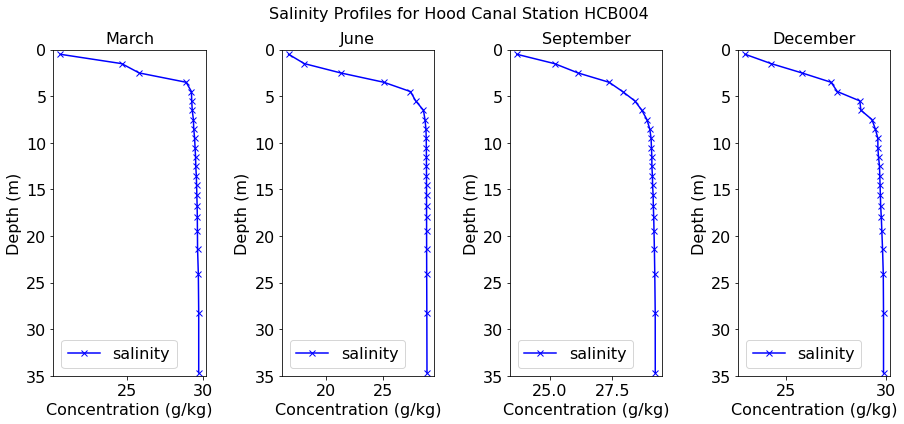

In [7]:
fig,ax=plt.subplots(1,4,figsize=(15,6)) #Ask for 2 subplots in the horizontal and controls size.
fig.subplots_adjust(wspace=.5) # space the axes out more
station='HCB004'
density_plot(ax,m_list,m_list_names,station,depth_range=(35,0))
fig.suptitle(f'Salinity Profiles for Hood Canal Station {station}')

Text(0.5, 0.98, 'Salinity Profiles for Main Basin Station EAP001')

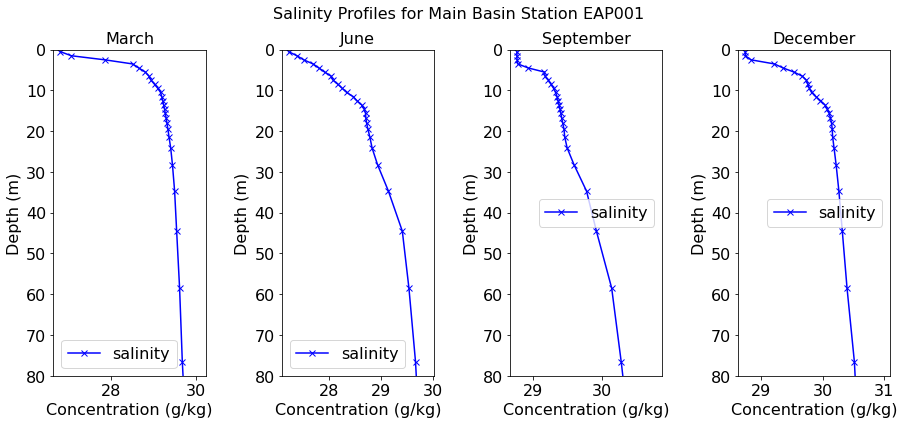

In [9]:
fig,ax=plt.subplots(1,4,figsize=(15,6)) #Ask for 2 subplots in the horizontal and controls size.
fig.subplots_adjust(wspace=.5) # space the axes out more
station='EAP001'
density_plot(ax,m_list,m_list_names,station,depth_range=(80,0))
fig.suptitle(f'Salinity Profiles for Main Basin Station {station}')

Text(0.5, 0.98, 'Salinity Profiles for Whidbey Basin Station SAR003')

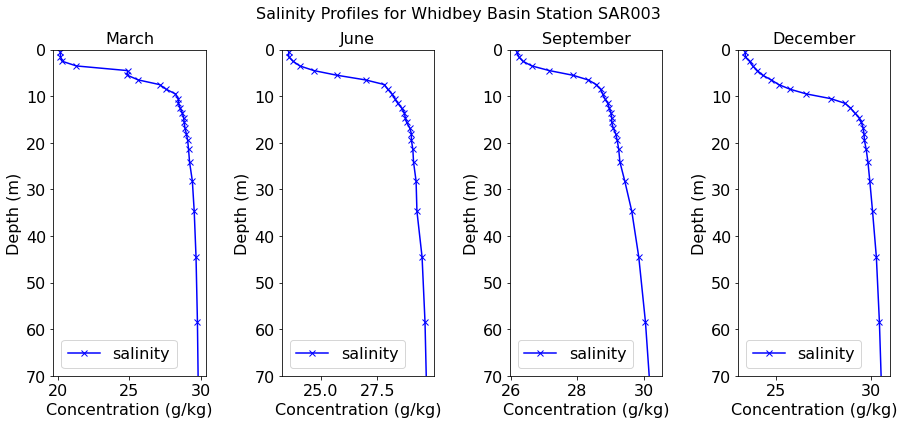

In [10]:
fig,ax=plt.subplots(1,4,figsize=(15,6)) #Ask for 2 subplots in the horizontal and controls size.
fig.subplots_adjust(wspace=.5) # space the axes out more
station='SAR003'
density_plot(ax,m_list,m_list_names,station,depth_range=(70,0))
fig.suptitle(f'Salinity Profiles for Whidbey Basin Station {station}')

Text(0.5, 0.98, 'Salinity Profiles for South Basin Station NSQ002')

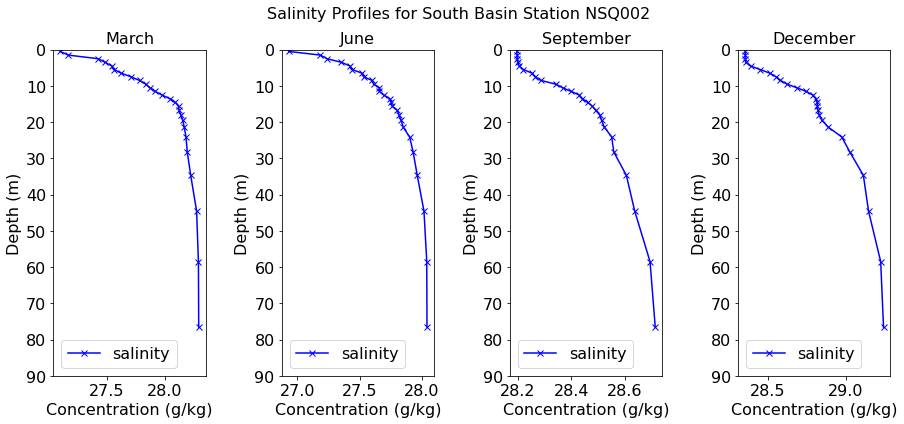

In [11]:
fig,ax=plt.subplots(1,4,figsize=(15,6)) #Ask for 2 subplots in the horizontal and controls size.
fig.subplots_adjust(wspace=.5) # space the axes out more
station='NSQ002'
density_plot(ax,m_list,m_list_names,station,depth_range=(90,0))
fig.suptitle(f'Salinity Profiles for South Basin Station {station}')

Text(0.5, 0.98, 'Salinity Profiles for Admiralty Inlet Station ADM001')

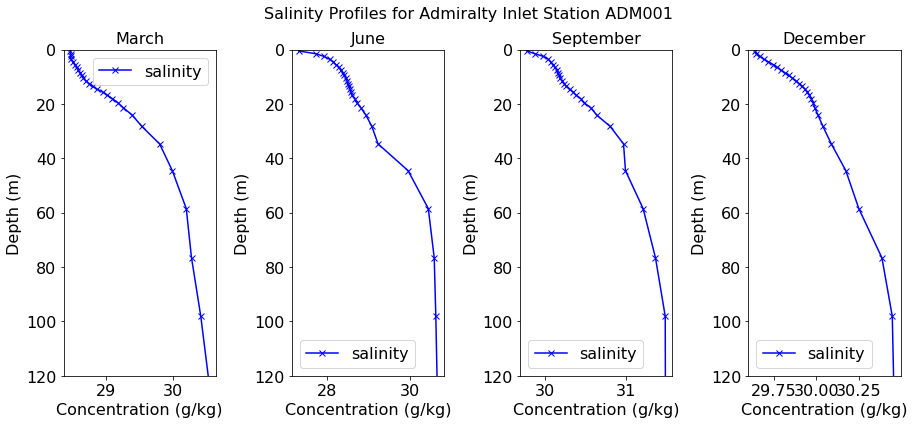

In [12]:
fig,ax=plt.subplots(1,4,figsize=(15,6)) #Ask for 2 subplots in the horizontal and controls size.
fig.subplots_adjust(wspace=.5) # space the axes out more
station='ADM001'
density_plot(ax,m_list,m_list_names,station,depth_range=(120,0))
fig.suptitle(f'Salinity Profiles for Admiralty Inlet Station {station}')
#0 to 15, 15 to 40, 40 and below

Text(0.5, 0.98, 'Salinity Profiles for Admiralty Inlet Station ADM003')

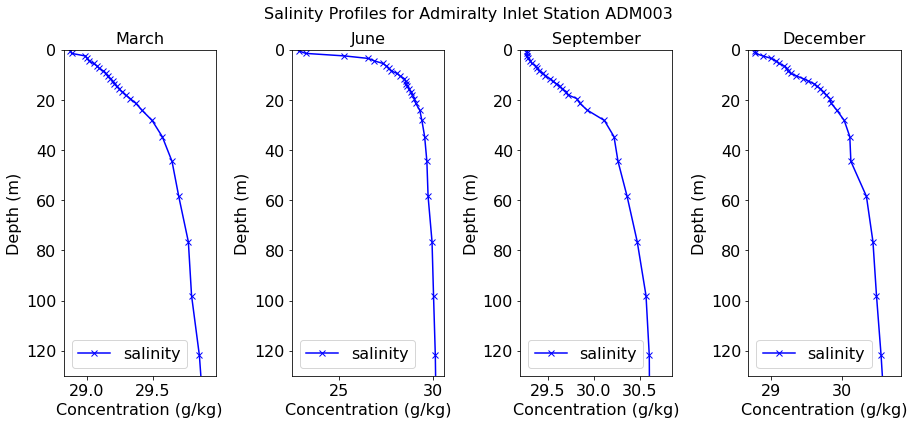

In [8]:
fig,ax=plt.subplots(1,4,figsize=(15,6)) #Ask for 2 subplots in the horizontal and controls size.
fig.subplots_adjust(wspace=.5) # space the axes out more
station='ADM003'
density_plot(ax,m_list,m_list_names,station,depth_range=(130,0))
fig.suptitle(f'Salinity Profiles for Admiralty Inlet Station {station}')

Text(0.5, 0.98, 'Salinity Profiles for Strait of Juan de Fuca SJF002')

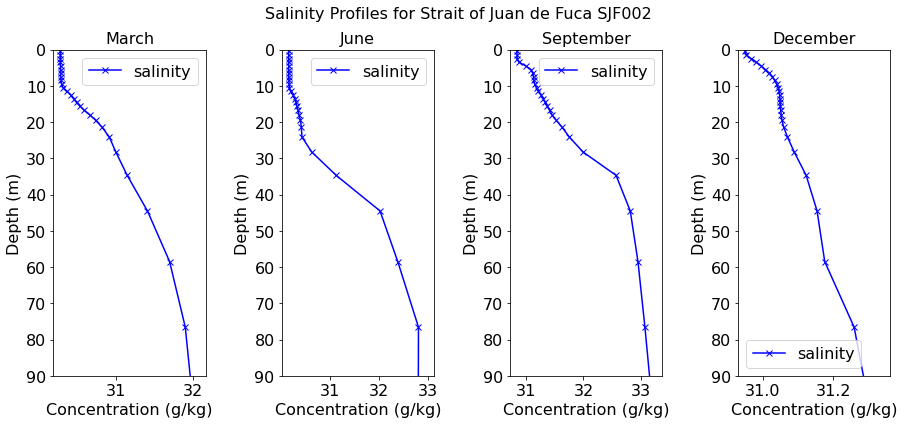

In [14]:
fig,ax=plt.subplots(1,4,figsize=(15,6)) #Ask for 2 subplots in the horizontal and controls size.
fig.subplots_adjust(wspace=.5) # space the axes out more
station='SJF002'
density_plot(ax,m_list,m_list_names,station,depth_range=(90,0))
fig.suptitle(f'Salinity Profiles for Strait of Juan de Fuca {station}')
#0 to 10, 10 to 40, greater than 40. 

Text(0.5, 0.98, 'Salinity Profiles for Strait of Georgia GRG002')

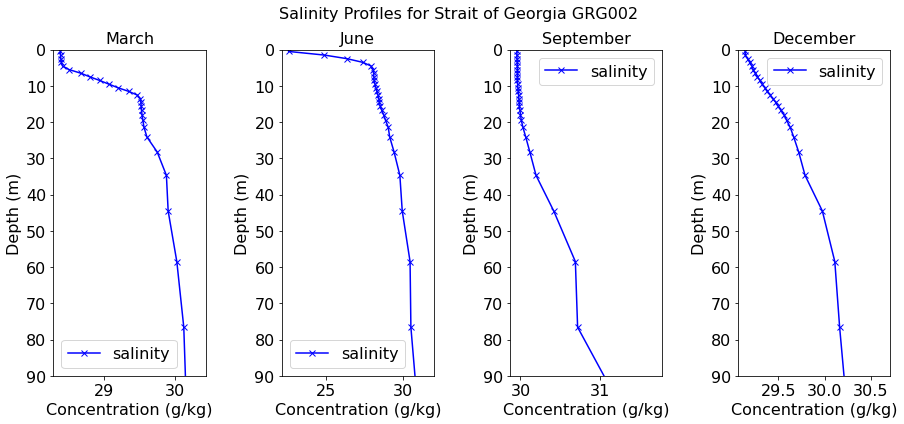

In [15]:
fig,ax=plt.subplots(1,4,figsize=(15,6)) #Ask for 2 subplots in the horizontal and controls size.
fig.subplots_adjust(wspace=.5) # space the axes out more
station='GRG002'
density_plot(ax,m_list,m_list_names,station,depth_range=(90,0))
fig.suptitle(f'Salinity Profiles for Strait of Georgia {station}')
# 0 to 5, 5 to 20, 20 and greater. 